In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.iux001 import fetch_data, aggregation_data
from lib.aux001 import calc_expression
from lib.cux001 import FactorEvaluate1

In [3]:
method = 'bicso0'
instruments = 'ims'
period = 5
datasets = ['train', 'val']

In [4]:
total_data = fetch_data(method=method,
                        instruments=instruments,
                        datasets=datasets)

./records/bicso0/ims/basic/train_data.feather


./records/bicso0/ims/basic/val_data.feather
./records/bicso0/ims/returns/train_returns.feather
./records/bicso0/ims/returns/val_returns.feather


In [5]:
total_data.tail()

,trade_time,code,fz002_1_2_1,fz002_10_15_1,fz002_1_2_0,fz002_10_15_0,fz002_5_10_1,fz002_5_10_0,fz002_2_3_1,fz002_2_3_0,...,openint,vwap,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,nxt1_ret_5h,nxt1_ret_10h,nxt1_ret_15h,time_weight,equal_weight
138569,2024-12-05 14:57:00,IM,0.000323,0.000013,0.000208,0.000006,0.000022,0.000006,0.000144,0.000057,...,160562.0,6252.429757,0.000471,-0.000053,0.001165,0.000185,-0.005063,-0.005872,0.000412,0.000528
138570,2024-12-05 14:58:00,IM,0.000418,0.000018,0.000184,0.000006,0.000037,0.000010,0.000245,0.000147,...,160871.0,6255.909792,-0.000524,0.000693,0.000968,-0.000817,-0.005733,-0.006333,0.000131,0.000379
138571,2024-12-05 14:59:00,IM,0.000139,0.000021,0.000000,0.000007,0.000045,0.000015,0.000180,0.000189,...,161166.0,6258.858028,0.001217,0.001491,0.000237,-0.001831,-0.003571,-0.005285,0.001145,0.000982
138572,2024-12-05 15:00:00,IM,0.000046,0.000023,0.000000,0.000007,0.000047,0.000020,0.000109,0.000139,...,161405.0,6255.580586,0.000274,-0.000980,-0.001510,-0.004046,-0.004387,-0.006110,-0.000441,-0.000739
138573,2024-12-06 09:30:00,IM,0.000228,0.000025,0.000086,0.000008,0.000049,0.000025,0.000125,0.000064,...,161294.0,6263.200000,-0.001254,-0.001785,-0.003322,-0.004555,-0.006665,-0.007756,-0.001776,-0.002120


In [6]:
expression = "MADecay(3,'tc004_1_1_2_0')"

In [7]:
factor_data = calc_expression(expression=expression,
                              total_data=total_data.set_index('trade_time'))

In [8]:
factor_data.head()

,trade_time,transformed,code
0,2022-07-25 09:31:00,5.380000,IM
1,2022-07-25 09:32:00,3.166667,IM
2,2022-07-25 09:33:00,1.741667,IM
3,2022-07-25 09:34:00,1.308333,IM
4,2022-07-25 09:35:00,3.775000,IM


In [9]:
dt = aggregation_data(factor_data=factor_data,
                      returns_data=total_data,
                      period=period)

In [10]:
dt.tail()

,trade_time,transformed,code,nxt1_ret_5h
138556,2024-12-05 14:45:00,-0.826876,IM,-0.000155
138561,2024-12-05 14:50:00,0.502032,IM,0.000463
138566,2024-12-05 14:55:00,0.137813,IM,0.002110
138571,2024-12-05 15:00:00,0.344532,IM,-0.004046
138572,2024-12-06 09:30:00,1.801408,IM,-0.004555


In [11]:
evaluate1 = FactorEvaluate1(factor_data=dt,
                                factor_name='transformed',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=expression)

In [12]:
stats_dt = evaluate1.run()

In [13]:
stats_dt

{'total_ret': 0.6956151133189199,
 'avg_ret': 1.9324321930906232e-05,
 'max_dd': -0.04950423536156734,
 'calmar': 14.051628274597316,
 'sharpe1': 0.023479436713316808,
 'sharpe2': 2.345120921537288,
 'turnover': 0.3137039970074867,
 'win_rate': 0.5000178234056963,
 'profit_ratio': 1.1193830406496468,
 'ic_mean': -0.040627878434283476,
 'ic_std': 0.08545699908210133,
 'ic_ir': -0.4754189694310579,
 'factor_autocorr': -0.02153996358543434,
 'ret_autocorr': -0.018030448396362874}

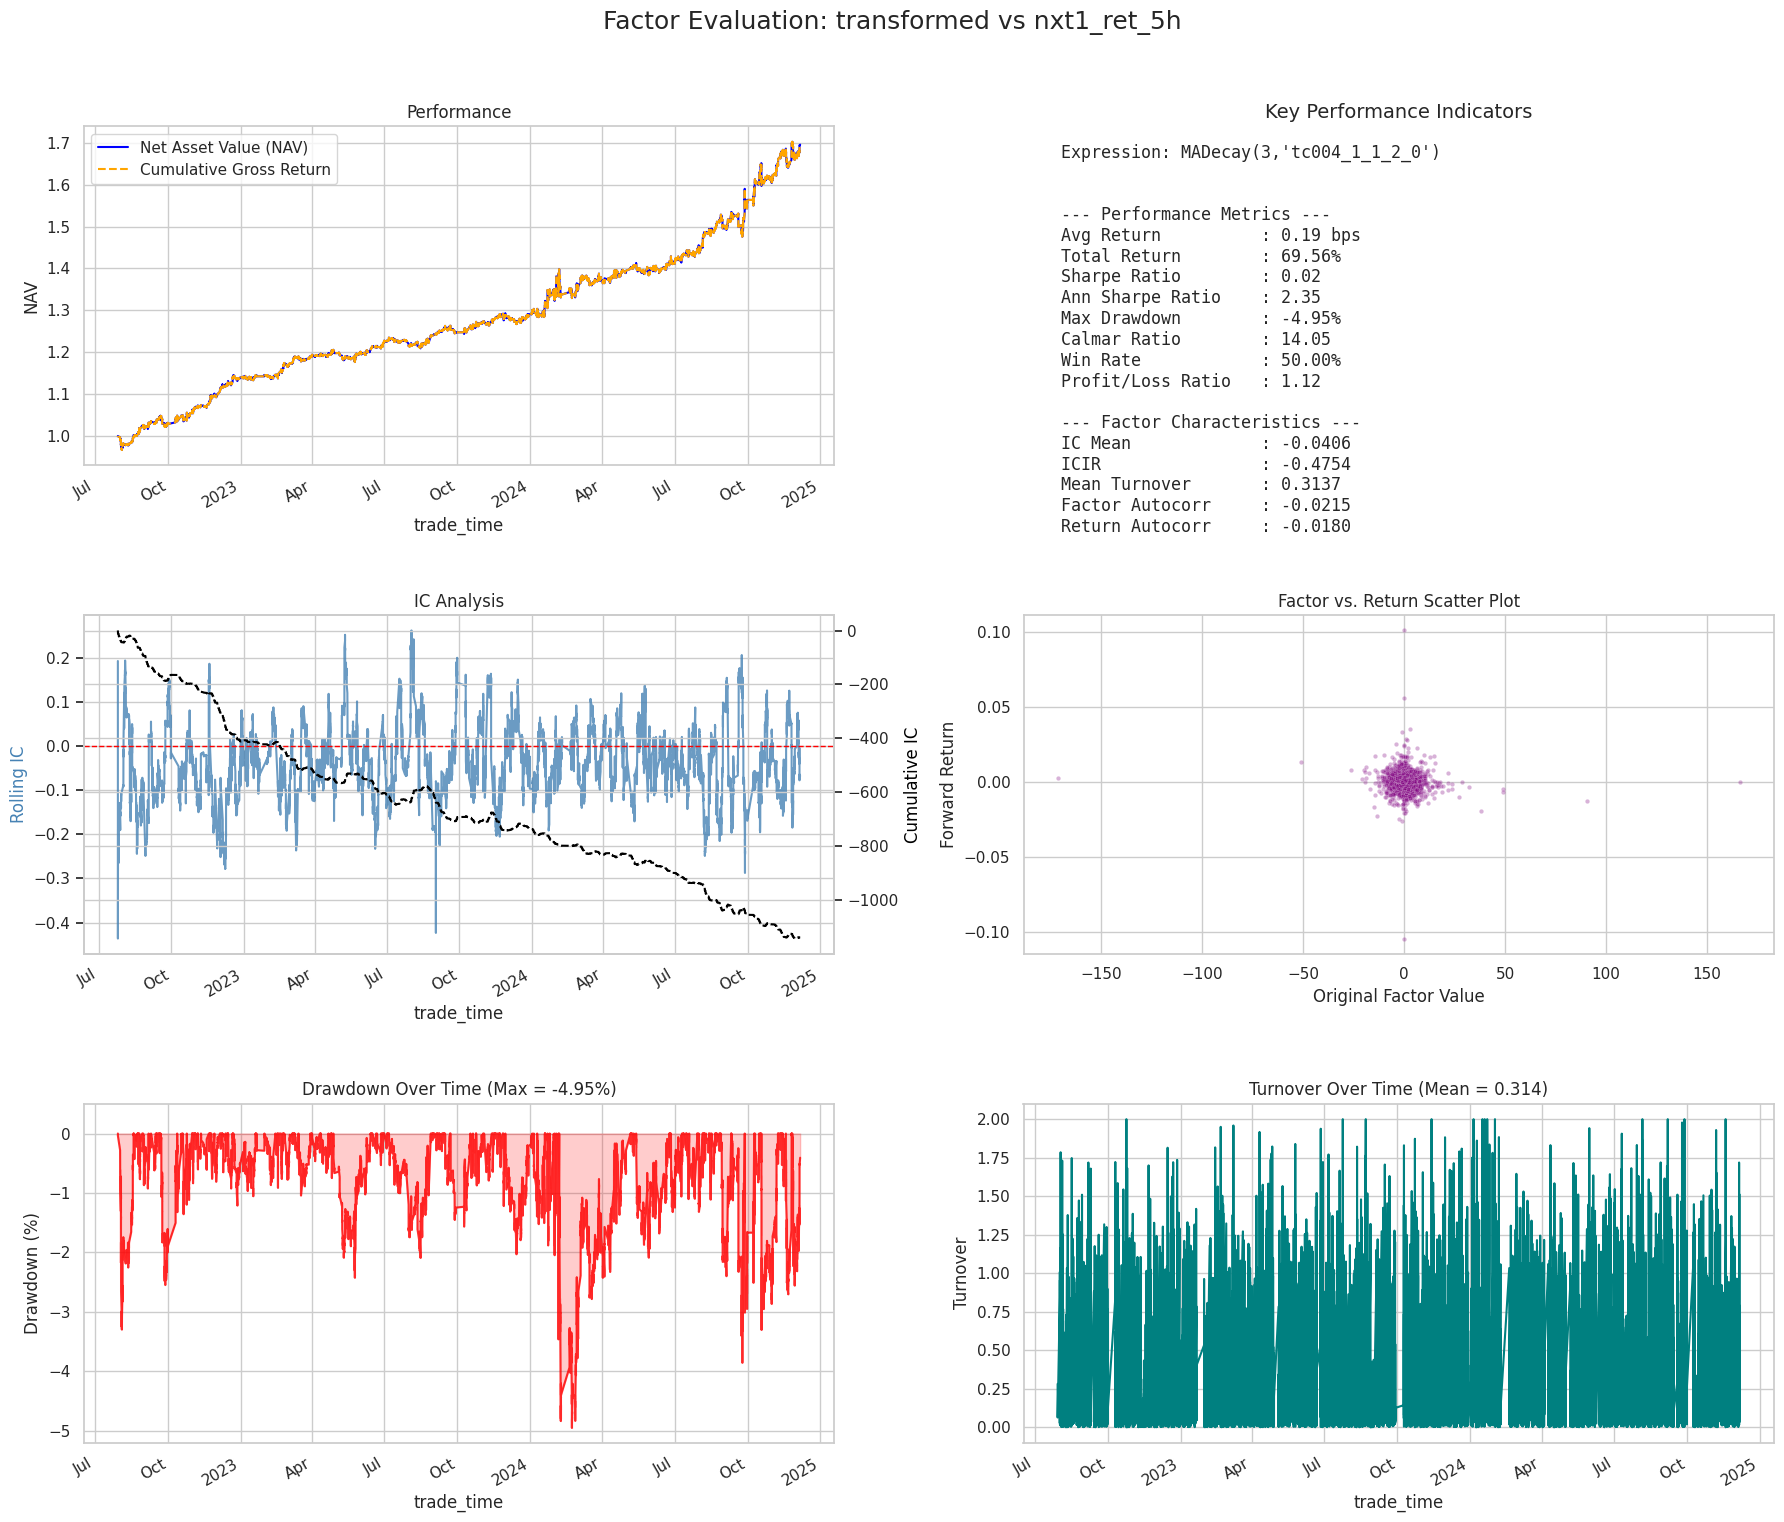

In [14]:
evaluate1.plot_results()